<a href="https://colab.research.google.com/github/Teasotea/IntelectualDataAnalysis/blob/main/lab2/IAD_Lab2_datasetB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №2. Побудова та оцiнювання якостi моделей класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python

### Мета роботи 
Побудова та оцiнювання якостi моделей дерев рiшень та
опорних векторiв для класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn.
Python, а також вивчення i застосування на практицi методiв логiстичної регресiї та байесiвської класифiкацiї.

### Вимоги до звіту
1) Аналiз декiлькох моделей

2) Пiдбiр гiперпараметрiв

3) Значення метрик якостi моделей

4) Оцiнка впливу розмiру навчальної вибiрки на якiсть моделi.

### Хiд виконання роботи:
1. Представити початковi данi графiчно.
2. Розбити данi на навчальний та валiдацiйний набори.

3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

4. Представити моделi графiчно (наприклад вивести частину дерева рi-
шень, побудувати лiнiю регресiї тощо).

5. Виконати прогнози на основi побудованих моделей.
6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

7. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi або iншi (згiдно з варiантом).

8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

9. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:

• матрицю неточностей (confusion matrix)

• точнiсть (precision)

• повноту (recall)

• мiру F1 (F1 score)

• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

10. В задачах регресiї розрахувати для кожної моделi наступнi критерiї яко-
стi, окремо на навчальнiй та валiдацiйнiй множинах:

• коефiцiєнт детермiнацiї R2

• помилки RMSE, MAE та MAPE

11. Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

12. Зробити висновки про якiсть роботи моделей на дослiджених даних. На
основi критерiїв якостi спробувати обрати найкращу модель.
13. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки
розмiр навчальної множини впливає на якiсть моделi.
14. Кожний варiант мiстить два набори даних. Дослiдити обидва набори за
наведеними вище етапами. Для кожного набору спробувати пiдiбрати
найкращу модель.

## Завдання

Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи `sklearn.tree.DecisionTreeClassifier` з рiзними значеннями гiперпараметрiв:

• `max_depth` – максимальна глибина дерева,

• `min_samples_split` – мiнiмальна кiлькiсть прикладiв, якi мають бути у вузлi, перш нiж його можна буде розщепити

• `min_samples_leaf` – мiнiмальна кiлькiсть прикладiв у листовому
вузлi

• `max_leaf_nodes` – максимальна кiлькiсть листових вузлiв

• `max_features` – максимальна кiлькiсть ознак, якi оцiнюються при розщепленнi кожного вузла.


# Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
# dataset B
data2 = pd.read_csv('/content/dataset_Malicious_and_Benign_Websites.csv')

In [5]:
data2.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


# Exploratory Data Analysis (Data Visualization)

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
cat_features = ['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']
date_features = ['WHOIS_REGDATE', 	'WHOIS_UPDATED_DATE']
target = 'Type'

In [8]:
data2 = data2.replace(['None', 'b'], float('nan'))

In [9]:
print(data2.isnull().sum())

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                129
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [10]:
data2 = data2.dropna(subset=date_features)

In [11]:
data2[date_features].iloc[:4]

,WHOIS_REGDATE,WHOIS_UPDATED_DATE
3,7/10/1997 4:00,12/09/2013 0:45
4,12/05/1996 0:00,11/04/2017 0:00
5,3/08/2016 14:30,3/10/2016 3:45
6,29/07/2002 0:00,1/07/2016 0:00


In [12]:
data2[date_features] = data2[date_features].apply(pd.to_datetime)

In [13]:
data2["reg_month"] = data2["WHOIS_REGDATE"].apply(lambda x: x.month)
data2["reg_day"] = data2["WHOIS_REGDATE"].apply(lambda x: x.day)
data2["reg_year"] = data2["WHOIS_REGDATE"].apply(lambda x: x.year)

data2["updated_month"] = data2["WHOIS_UPDATED_DATE"].apply(lambda x: x.month)
data2["updated_day"] = data2["WHOIS_UPDATED_DATE"].apply(lambda x: x.day)
data2["updated_year"] = data2["WHOIS_UPDATED_DATE"].apply(lambda x: x.year)

In [14]:
data2[cat_features].nunique()

URL               1640
CHARSET              8
SERVER             227
WHOIS_COUNTRY       46
WHOIS_STATEPRO     179
dtype: int64

In [15]:
data2['CHARSET'].value_counts() 

UTF-8           605
ISO-8859-1      407
utf-8           357
us-ascii        144
iso-8859-1      117
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [16]:
encoder = OneHotEncoder(sparse=False)
enc = encoder.fit_transform(np.array(data2["CHARSET"]).reshape(-1,1))
enc_df = pd.DataFrame(enc)

In [17]:
data2.reset_index(drop=True, inplace=True)

In [18]:
data2 = data2.join(enc_df)

In [19]:
labelencoder = LabelEncoder()
data2['URL'] = labelencoder.fit_transform(data2['URL'])
data2['SERVER'] = labelencoder.fit_transform(data2['SERVER'])
data2['WHOIS_COUNTRY'] = labelencoder.fit_transform(data2['WHOIS_COUNTRY'])
data2['WHOIS_STATEPRO'] = labelencoder.fit_transform(data2['WHOIS_STATEPRO'])

In [20]:
data2["CONTENT_LENGTH"] = data2["CONTENT_LENGTH"].fillna(value=data2["CONTENT_LENGTH"].mean())

In [21]:
data2.fillna(0, inplace=True)

In [22]:
data2.drop(columns=["CHARSET","WHOIS_REGDATE","WHOIS_UPDATED_DATE"], inplace=True)

Дізнаємося, які класи присутні в даних

In [23]:
data2[target].value_counts()

0    1484
1     156
Name: Type, dtype: int64

In [24]:
data2.corr()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,reg_month,reg_day,reg_year,updated_month,updated_day,updated_year,0,1,2,3,4,5,6,7,8
URL,1.000000,0.139589,0.181572,-0.112688,2.275048e-03,-0.146287,-0.057176,0.073468,0.007049,0.128255,-0.008383,0.087969,0.081958,0.059893,-0.007498,0.087969,0.231672,0.508155,0.100141,0.028226,0.149155,-0.127703,-0.034532,0.038994,0.002478,0.016016,0.070631,-0.038467,-0.026272,-0.057875,0.035244,2.214803e-02,-0.019272
URL_LENGTH,0.139589,1.000000,0.924049,-0.128142,1.024632e-01,-0.138071,-0.089386,-0.040783,-0.044165,-0.042960,-0.027905,-0.043928,-0.035261,-0.015401,-0.028104,-0.043928,-0.060011,0.266566,0.120051,0.016165,0.011227,-0.046712,-0.016424,-0.034486,-0.013059,-0.091884,0.198963,-0.079010,-0.062414,-0.034610,-0.018346,-1.129663e-02,-0.045626
NUMBER_SPECIAL_CHARACTERS,0.181572,0.924049,1.000000,-0.123505,1.729063e-01,-0.144943,-0.095271,-0.042041,-0.044002,-0.053289,-0.024623,-0.045222,-0.034610,-0.015260,-0.024838,-0.045222,-0.060063,0.343159,0.109974,-0.003556,0.023197,-0.050695,-0.056777,-0.012048,0.004522,-0.091801,0.213964,-0.091509,-0.100201,-0.021520,-0.011313,-1.131322e-02,-0.035983
SERVER,-0.112688,-0.128142,-0.123505,1.000000,4.575717e-03,0.195351,-0.043964,0.000796,0.048834,0.054264,-0.020494,0.006761,-0.006657,-0.020709,-0.020196,0.006761,0.083859,-0.229859,-0.107783,-0.010395,-0.148482,0.069305,-0.085861,-0.018747,-0.031308,0.084570,-0.098889,-0.166547,0.057411,0.089225,-0.030064,9.740838e-03,0.034651
CONTENT_LENGTH,0.002275,0.102463,0.172906,0.004576,1.000000e+00,-0.035398,0.009666,0.026129,-0.003308,-0.012771,0.000895,0.024166,0.028413,0.051867,0.000821,0.024166,-0.019492,-0.042458,0.011822,0.010291,-0.095265,0.034588,0.069302,0.019997,-0.006122,-0.053357,0.075576,-0.106522,-0.139233,0.133405,-0.011875,-9.935999e-18,-0.018468
WHOIS_COUNTRY,-0.146287,-0.138071,-0.144943,0.195351,-3.539813e-02,1.000000,-0.018656,0.001082,0.012420,0.081149,-0.054174,0.008770,-0.004599,-0.004754,-0.053758,0.008770,0.110610,-0.259963,-0.132521,0.026710,-0.282202,0.057894,0.142873,-0.091368,0.022188,0.016493,-0.109036,0.010058,0.047615,0.068318,0.010183,1.018256e-02,0.002745
WHOIS_STATEPRO,-0.057176,-0.089386,-0.095271,-0.043964,9.665872e-03,-0.018656,1.000000,-0.021549,-0.064762,0.086663,-0.032677,-0.018728,-0.018677,-0.012219,-0.032523,-0.018728,0.036212,-0.056060,0.098254,-0.089852,0.013031,0.073338,0.049142,-0.025846,0.039966,0.036360,-0.099628,0.128673,0.111222,-0.080822,-0.010056,2.898565e-02,-0.005095
TCP_CONVERSATION_EXCHANGE,0.073468,-0.040783,-0.042041,0.000796,2.612893e-02,0.001082,-0.021549,1.000000,0.547082,0.318623,0.471180,0.997841,0.992147,0.872793,0.472460,0.997841,0.341543,-0.048732,-0.003466,0.061749,-0.025734,0.022870,0.019177,-0.002568,-0.004777,0.032185,-0.008002,-0.041820,-0.023398,0.018983,-0.008426,-5.198856e-04,-0.002299
DIST_REMOTE_TCP_PORT,0.007049,-0.044165,-0.044002,0.048834,-3.308029e-03,0.012420,-0.064762,0.547082,1.000000,0.206367,0.816848,0.552124,0.576193,0.233616,0.817834,0.552124,0.276174,-0.076449,-0.076582,0.027085,-0.025442,0.026498,0.050897,-0.013957,-0.006315,-0.007371,0.014992,-0.049934,-0.020530,0.035703,-0.006315,-6.314834e-03,0.005322
REMOTE_IPS,0.128255,-0.042960,-0.053289,0.054264,-1.277079e-02,0.081149,0.086663,0.318623,0.206367,1.000000,0.022410,0.348784,0.294301,0.160108,0.024498,0.348784,0.548302,-0.129713,-0.042793,0.014413,-0.035895,0.004061,0.021346,0.003675,0.000146,0.021703,-0.007009,-0.043718,-0.007047,0.016620,-0.007130,-7.130052e-03,0.011409


# Split data into train and test

In [25]:
data2.columns = [                      'URL',                'URL_LENGTH',
       'NUMBER_SPECIAL_CHARACTERS',                    'SERVER',
                  'CONTENT_LENGTH',             'WHOIS_COUNTRY',
                  'WHOIS_STATEPRO', 'TCP_CONVERSATION_EXCHANGE',
            'DIST_REMOTE_TCP_PORT',                'REMOTE_IPS',
                       'APP_BYTES',        'SOURCE_APP_PACKETS',
              'REMOTE_APP_PACKETS',          'SOURCE_APP_BYTES',
                'REMOTE_APP_BYTES',               'APP_PACKETS',
                 'DNS_QUERY_TIMES',                      'Type',
                       'reg_month',                   'reg_day',
                        'reg_year',             'updated_month',
                     'updated_day',              'updated_year',
                                 '0',                           '1',
                                 '2',                           '3',
                                 '4',                           '5',
                                 '6',                           '7',
                                 '8']

In [26]:
cols = list(data2.columns)
cols.remove(target)

In [27]:
X_Train, X_Test,y_Train, y_Test  = train_test_split(data2[cols], data2[target], test_size=0.1, random_state=42)

In [28]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((1476, 32), (1476,), (164, 32), (164,))

In [29]:
y_Train.value_counts()

0    1332
1     144
Name: Type, dtype: int64

# Train Model

In [30]:
model = DecisionTreeClassifier()
model.fit(X_Train, y_Train)

DecisionTreeClassifier()

# Visualize Results

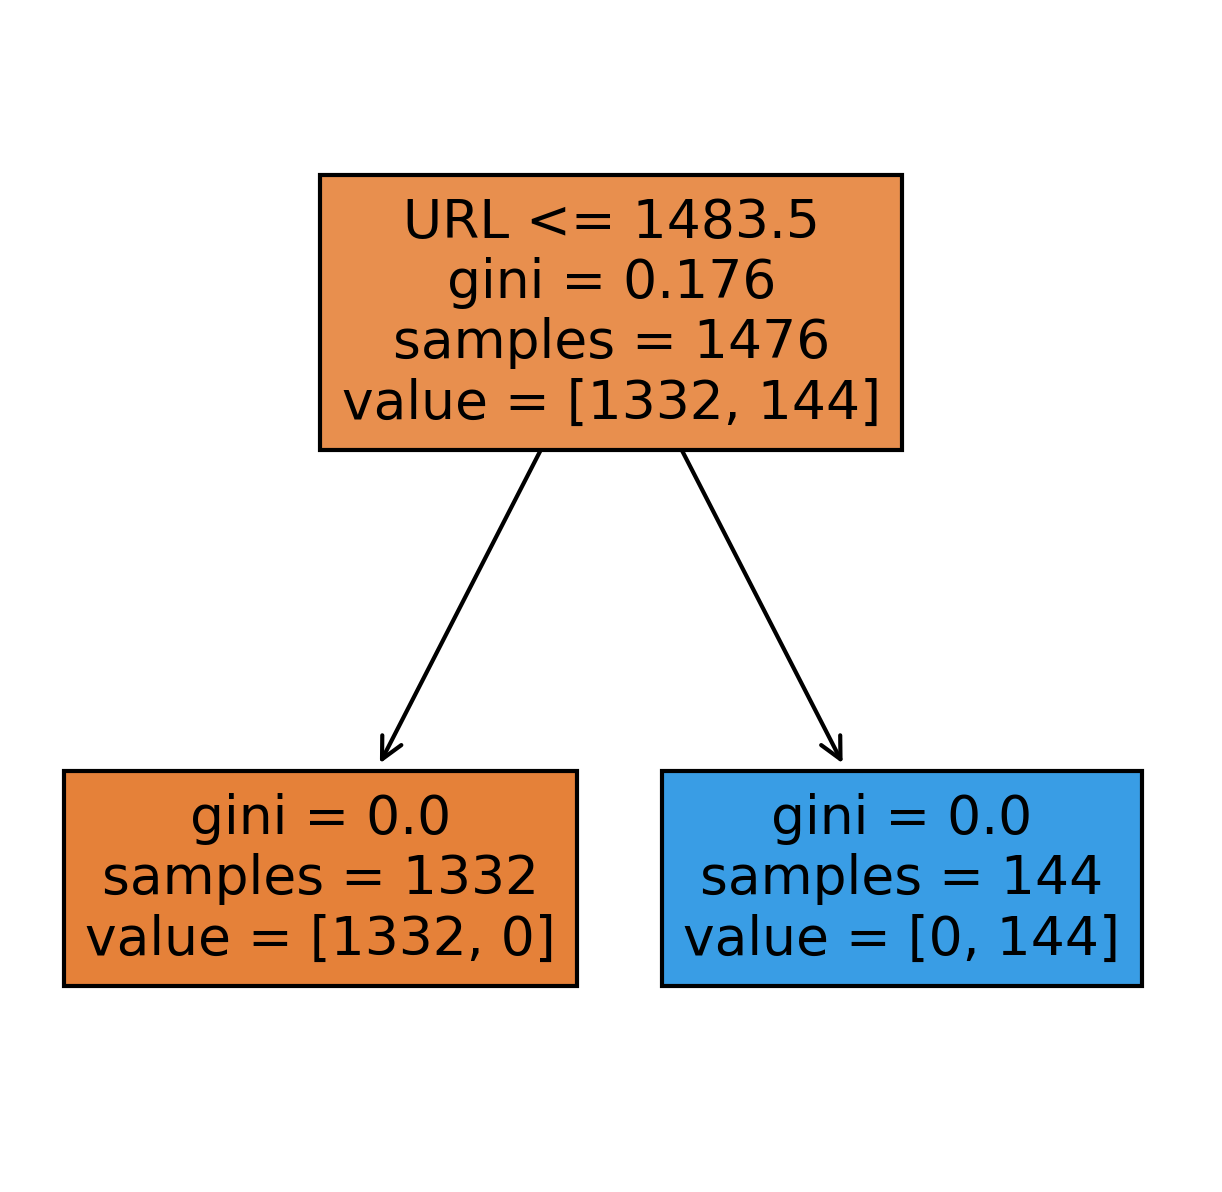

In [31]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5, 5), dpi=300)
tree.plot_tree(model, feature_names=cols, filled = True);

# Predict

In [32]:
predictions = model.predict(X_Test)

In [33]:
pred_score = model.predict_proba(X_Test)

In [34]:
print(accuracy_score(y_Test, predictions))

1.0


# Cross-validation 

In [35]:
accuracy = cross_val_score(model, data2[cols], data2[target], scoring='accuracy', cv = 10)
print(accuracy)

[1.         1.         1.         0.99390244 1.         1.
 1.         1.         1.         1.        ]


In [36]:
print(accuracy.mean())

0.999390243902439


# Avoid overfitting

Let's show line plots of the model accuracy on the train and test sets with different tree depths.

In [37]:
#tree depths
values = [i for i in range(1, 21)]

>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


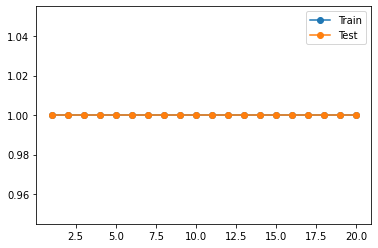

In [38]:
train_scores, test_scores = list(), list()

for i in values:
	model_f = DecisionTreeClassifier(max_depth=i)
	model_f.fit(X_Train, y_Train)
	train_yhat = model_f.predict(X_Train)
	train_acc = accuracy_score(y_Train, train_yhat)
	train_scores.append(train_acc)
 
	test_yhat = model_f.predict(X_Test)
	test_acc = accuracy_score(y_Test, test_yhat)
	test_scores.append(test_acc)
 
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))


plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Decision Boundary

In [39]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

In [41]:
# plot_decision_boundary(model, np.array(X_Train), np.array(y_Train))


# Evaluation

• confusion matrix

• precision

• recall

• F1 score

• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

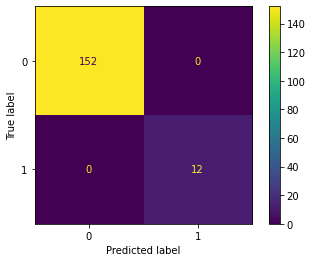

In [42]:
cm = confusion_matrix(y_Test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [43]:
print(classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00        12

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



In [44]:
encoder = OneHotEncoder(sparse=False)
y_test = encoder.fit_transform(np.array(y_Test).reshape(-1, 1))

In [49]:
def calculate_tpr_fpr(y_real, y_pred):
    
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    tpr =  TP/(TP + FN) 
    fpr = 1 - TN/(TN+FP) 
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

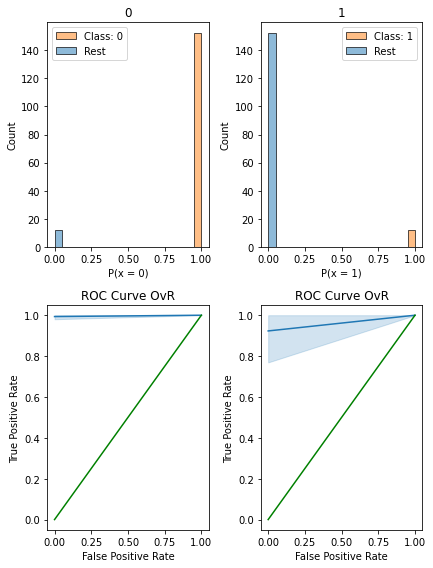

In [50]:
classes = model.classes_

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_Test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_Test]
    df_aux['prob'] = pred_score[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [51]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

0 ROC AUC OvR: 1.0000
1 ROC AUC OvR: 1.0000
average ROC AUC OvR: 1.0000


In [53]:
roc_auc_score(y_test, pred_score, labels = classes, multi_class = 'ovr', average = 'macro')

1.0

# Grid Search

• max_depth – indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. 

• min_samples_split – represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.

• min_samples_leaf – the minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

• max_leaf_nodes – максимальна кiлькiсть листових вузлiв

• max_features - the number of features to consider each time to make the split decision

In [54]:
param_dict = {'max_depth':np.linspace(1, 32, 32, endpoint=True),
              'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
              'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
              'max_leaf_nodes': np.linspace(2, 10, 5, endpoint=True),
              'max_features':list(range(1,X_Train.shape[1]))}

In [57]:
clf_GS = GridSearchCV(model, param_grid=param_dict, cv=5, verbose=1, n_jobs=-1)
clf_GS.fit(X_Train, y_Train)

In [ ]:
clf_GS.best_params_

In [ ]:
clf_GS.best_score_